# Import dependencies

In [1]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA 
import scipy.cluster.hierarchy as shc 
from sklearn.model_selection import KFold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Config Params

In [2]:
TEST_SIZE = 0.2
RANDOM_SEED = 42
K_FOLDS = 3

# Our chosen datasets
TODO
We have chosen the datasets based on the following criteria:
- datasets where we do not need to do any special preprocessing so that it is easy to do in only one pipeline
- rather small datasets to ensure we do not need high computational power

In [33]:
# Dataset that seems useful
dataset_id = {
    "iris": 53, 
    "heart_disease": 45, 
    "wine_quality": 186, 
    "breast_cancer_wisconsin_diagnostic": 17, 
    "car_evaluation": 19, 
    "abalone": 1, 
    "mushroom": 73, 
    "statlog" : 144, 
    "credit_approval" : 27, 
    "zoo" : 111, 
    "balance_scale" : 12, 
    "ilpd" : 225, 
    "acute_inflamations" : 184, 
    "ecoli" : 39, 
    "mammographic_mass" : 161, 
    "hayes_roth" : 44, 
    "habermans_survival" : 43, 
    "congress_voting_records" : 105, 
    "balloons" : 13, 
    "lenses" : 58, 
    "fertility" : 244, 
}

data_set_sorted = {}
for i, name in enumerate(sorted(dataset_id.keys())):
    data_set_sorted[name] =(dataset_id[name], i)

print(data_set_sorted)


{'abalone': (1, 0), 'acute_inflamations': (184, 1), 'balance_scale': (12, 2), 'balloons': (13, 3), 'breast_cancer_wisconsin_diagnostic': (17, 4), 'car_evaluation': (19, 5), 'congress_voting_records': (105, 6), 'credit_approval': (27, 7), 'ecoli': (39, 8), 'fertility': (244, 9), 'habermans_survival': (43, 10), 'hayes_roth': (44, 11), 'heart_disease': (45, 12), 'ilpd': (225, 13), 'iris': (53, 14), 'lenses': (58, 15), 'mammographic_mass': (161, 16), 'mushroom': (73, 17), 'statlog': (144, 18), 'wine_quality': (186, 19), 'zoo': (111, 20)}


# Import and preprocess datasets
For the preprocessing we will do the following steps:
1. Remove any missing values. In the article the following is written: "Given that our classifiers are not oriented to data with missing features, the missing inputs are treated as zero, which should not bias the comparison results." We therefore also decided to just remove missing values and to more focus on the full pipeline instead of single datasets. Another way could have been interpolation.
2. Encode categorical data into numerical data. This we have to do to use the classifiers later on.
3. Remove certain columns if they are highly correlated to others.
4. Split the data into a train and a test set. We will use a 80/20 split.
5. Scale the data so that we have zero mean and standard deviation of one. This is done with the Standard scaler.

In [4]:
# function for converting categorical features into numerical
def encode_categorical_features(X, encoder):
    X = encoder.fit_transform(X)
    return X

In [5]:
def import_dataset(uci_id, encoder):
    # get the dataset
    dataset = fetch_ucirepo(id=uci_id) 
    # load data into dataframe for easier preprocessing
    df = pd.concat([dataset["data"]["features"],dataset["data"]["targets"] ],axis=1)
    # remove nan values
    df.dropna(inplace=True)
    
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1:]
    # encode categorical data only for features not for target itself
    # https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
    cols = X.columns
    num_cols = X._get_numeric_data().columns
    #print(num_cols)
    categorical_cols = list(set(cols) - set(num_cols))
    #print(categorical_cols)
    X.loc[:, categorical_cols] = encode_categorical_features(X[categorical_cols], encoder)
    
    # check if encoding has worked
    # https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical
    for c in X.columns:
        if X[c].dtype.name == "category":
            print(f"WARNING: Column {c} still has categorical values!")
            
    # last column is target
    return X, y

In [ ]:
ordinal_encoder = OrdinalEncoder()
X, y = import_dataset(dataset_id["breast_cancer_wisconsin"], ordinal_encoder)
y = encode_categorical_features(y, ordinal_encoder)

    Diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.

In [7]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

# Testing different classifiers

In [8]:
def test_classifier(clf, clf_name, params, X_train, y_train, X_test, y_test):
    # https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
    pipe = Pipeline([('scaler', StandardScaler()), (clf_name, clf)])
    scoring = 'accuracy'
    gs_knn = GridSearchCV(pipe,
                        param_grid=params,
                        scoring=scoring,
                        cv=K_FOLDS)

    # Ravel to convert from (len, 1) shape to (len,), warning from sk-learn
    y_train = np.ravel(y_train)

    gs_knn.fit(X_train, y_train)
    print(gs_knn.best_params_)
    # find best model score
    y_pred_train = gs_knn.best_estimator_.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    # TODO
    train_f1 = f1_score(y_train, y_pred_train, average="weighted")
    #train_score = gs_knn.score(X_train, y_train)

    # test on test set
    y_pred_test = gs_knn.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    # TODO
    test_f1 = f1_score(y_test, y_pred_test, average="weighted")
    #test_score = gs_knn.score(X_test, y_test)

    print(f"{clf_name}, Train accuracy = {train_acc}, Test accuracy = {test_acc}")
    print(f"{clf_name}, Train f1-score = {train_f1}, Test f1-score = {test_f1}")

    # Confusion Matrix
    print("Confusion Matrix for train set")
    cm_train = confusion_matrix(y_train, y_pred_train, labels=gs_knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=gs_knn.classes_)
    disp.plot()
    plt.show()

    print("Confusion Matrix for test set")
    cm_test = confusion_matrix(y_test, y_pred_test, labels=gs_knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=gs_knn.classes_)
    disp.plot()
    plt.show()


# K-Nearest Neighbor classifier

{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
knn, Train accuracy = 0.9802197802197802, Test accuracy = 0.9473684210526315
knn, Train f1-score = 0.9801024331803986, Test f1-score = 0.9473684210526315
Confusion Matrix for train set


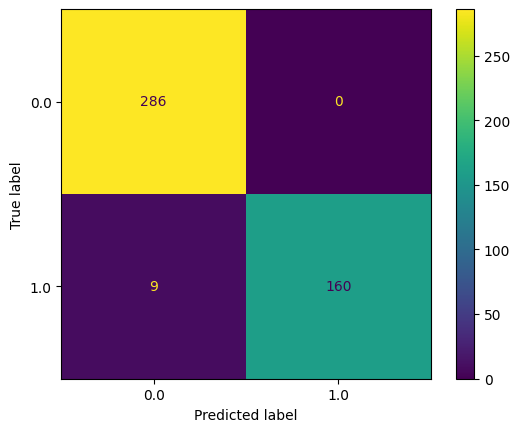

Confusion Matrix for test set


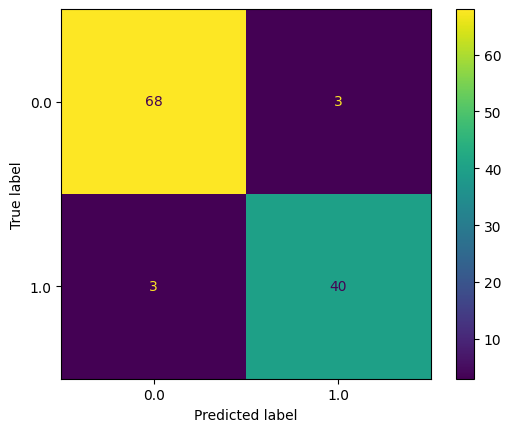

In [9]:
# https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
knn = KNeighborsClassifier()
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

test_classifier(knn, "knn", params, X_train, y_train, X_test, y_test)


# SVM

{'svm__C': 1000, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}
svm, Train accuracy = 0.9824175824175824, Test accuracy = 0.9736842105263158
svm, Train f1-score = 0.9823958851833416, Test f1-score = 0.973621425014614
Confusion Matrix for train set


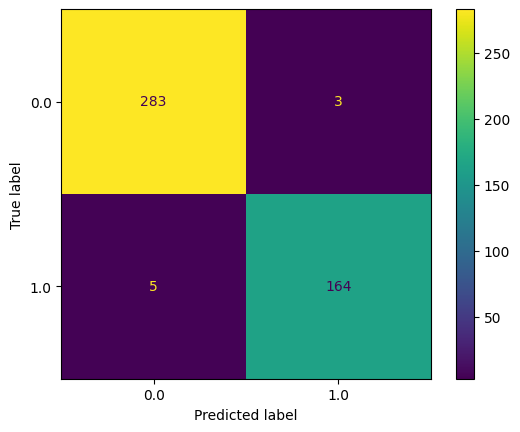

Confusion Matrix for test set


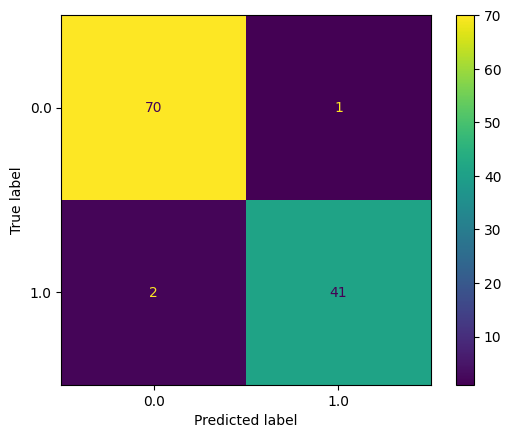

In [10]:
svm = SVC()
# params taken from here: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
params = [{'svm__C': [0.1, 1, 10, 100, 1000],  
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'svm__kernel': ['rbf']} ]

test_classifier(svm, "svm", params, X_train, y_train, X_test, y_test)

# Linear Regression

In [11]:
# log_reg = LogisticRegression()
# # params taken from here: https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/
# params = [
#     {'log_reg__penalty':['l1','l2','elasticnet','none'],
#     'log_reg__C' : np.logspace(-4,4,20),
#     'log_reg__solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'log_reg__max_iter'  : [100,1000,2500,5000]
# }
# ]

# test_classifier(log_reg, "log_reg", params, X_train, y_train, X_test, y_test)

# Unsupervised Classification

In [12]:
def kmeans_classification(X_train, y_train, X_test):
    # get the amount of clusters
    n_clusters = len(np.unique(y_train))
    # create k-means classifier
    kmeans = KMeans(n_clusters = n_clusters, random_state=42)

    # normalize train data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    kmeans.fit(X_train)

    cluster_labels = kmeans.predict(X_train)
    labels_map = {}
    # loops through all cluster labels
    for cluster in np.unique(cluster_labels):
        class_label = mode(y_train[cluster_labels == cluster])[0] # selects the most common label for that cluster
        labels_map[cluster] = class_label # map that label to the cluster

    y_pred_train = np.array([labels_map[cluster] for cluster in cluster_labels]) # maps cluster to labels

    # normalize test data using train data mean and std
    X_test = scaler.transform(X_test)

    # predict and map for test set
    test_clusters = kmeans.predict(X_test)
    y_pred_test = np.array([labels_map[cluster] for cluster in test_clusters])

    return y_pred_train, y_pred_test

# Add Agglomerative Clustering
https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/

In [14]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score

# function to align cluster labels with ground truth and calculate accuracy
# based on these sources:
# https://docs.neurodata.io/notebooks/pedigo/graspologic/clustering/2020/10/12/remapping-labels.html
# https://stackoverflow.com/questions/4075669/hungarian-algorithm-in-python
# https://se.mathworks.com/matlabcentral/answers/1470216-matching-the-labels-of-a-clustering-with-ground-truth-labels-for-performance-analysis
def cluster_accuracy(y_true, y_pred):
    """
    Align clustering labels with true labels and calculate accuracy.
    """
    # create contingency table, similar to confusion matrix   
    contingency_table = confusion_matrix(y_true, y_pred)

    # Hungarian algorithm to find the optimal one-to-one mapping between the predicted labels 
    # and the true labels based on the contingency table
    # based on https://stackoverflow.com/questions/4075669/hungarian-algorithm-in-python we can use linear_sum_assignment for this
    row_ind, col_ind = linear_sum_assignment(contingency_table, maximize=True)

    # remapping of labels
    label_map = dict(zip(col_ind, row_ind))
    remapped_y_pred = np.vectorize(label_map.get)(y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, remapped_y_pred)
    return accuracy



Clustering Accuracy: 0.86
Clustering Accuracy: 0.80


In [25]:
from itertools import product

def agg_clustering(X_train, y_train, X_test, y_test):
        
    # split train set into train and validation set to perform a grid search
    # TODO
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=RANDOM_SEED)
    
    # Scaling based on train set
    scaler = StandardScaler() 
    X_train_scaled = scaler.fit_transform(X_train)
    
    # scale val and test set with params of train set
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # create grid or params that we want to test
    metrics = ["euclidean", "l1", "l2", "manhattan"]
    linkages = ["complete", "average", "single"]
    pca_options = [True, False]
    
    # Ensure ward is only paired with euclidean
    param_grid = [
        {'metric': 'euclidean', 'linkage': 'ward', 'pca': pca}
        for pca in pca_options
    ] + [
        {'metric': metric, 'linkage': linkage, 'pca': pca}
        for metric, linkage, pca in product(metrics, linkages, pca_options)
        if linkage != 'ward' or metric == 'euclidean'
    ]
    
    best_score = -1
    best_params = None
    
    for params in param_grid:
        
        # apply PCA if specified
        if params["pca"]:
            pca = PCA(n_components = 2, random_state=RANDOM_SEED) 
            X_transformed = pca.fit_transform(X_train_scaled) 
            X_val_transformed = pca.transform(X_val_scaled)
        else:
            X_transformed = X_train_scaled
            X_val_transformed = X_val_scaled
            
        agg_clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_train)), metric=params["metric"], linkage=params["linkage"])
        train_pred = agg_clustering.fit_predict(X_transformed)
        val_pred = agg_clustering.fit_predict(X_val_transformed)
        
        train_acc = cluster_accuracy(y_train, train_pred)
        val_acc = cluster_accuracy(y_val, val_pred)
        
        # use a score to select hyperparams both based on best train accuracy but also on best validation accuracy
        #gamma = 0.5
        #score = val_acc - gamma * abs(train_acc - val_acc)
        score = 0.8 * val_acc + 0.2 * train_acc
        if score > best_score:
            best_params = params
            best_score = score
            
    print(f"Best score {best_score} with params {best_params}")
    if best_params["pca"]:
        pca = PCA(n_components = 2, random_state=RANDOM_SEED) 
        pca.fit(X_train_scaled) 
        X_test_transformed = pca.transform(X_test_scaled)
    else:
        X_test_transformed = X_test_scaled
        
    
    agg_clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_train)), metric=best_params["metric"], linkage=best_params["linkage"])    
    test_pred = agg_clustering.fit_predict(X_test_transformed)
    test_acc = cluster_accuracy(y_test, test_pred)
    print(f"Test accuracy = {test_acc}")
    
    

In [26]:
agg_clustering(X_train, y_train, X_test, y_test)

Best score 0.9267991920909961 with params {'metric': 'euclidean', 'linkage': 'ward', 'pca': False}
Test accuracy = 0.7982456140350878
